In [1]:
from modules.tweet_data import read_raw_data

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
tweet_df = read_raw_data()

Reading data


In [3]:
tweet_df.tail()

,tweet_id,handle,tweet
timestamp,,,
2020-07-11 00:32:55,1281687871406186497,RANsquawk,Cheers good sir!!! you too mate :)
2020-07-11 00:37:10,1281688941389905921,lindayueh,"Prime Minister, who posed in a face covering f..."
2020-07-11 00:52:55,1281692904071876611,bopinion,"Today, roughly 20% of all U.S.-listed stocks a..."
2020-07-11 01:22:53,1281700446281838605,bopinion,We'll have to re-think some of our notions abo...
2020-07-11 01:53:32,1281708159606894598,bopinion,Something important is afoot. Chinese stock ...


In [18]:
tweet_df = tweet_df[tweet_df.index < '06-01-2020']

## Tweets per day

2012-11-07 obama election  
2015-07-08 The New York Stock Exchange stops trading for nearly four hours due to a technical error  
2015-09-17 Fed meeting  
2015-12-16 US Federal Reserve raises interest rates by 0.25% for the first time since 2006  
2016-03-16 Fed leaves rates unchanged  
2016-06-24 Brexit  
2016-10-20 Debate  
2016-11-09  Trump election  
2017-06-09 Conservatives lose majority in UK  
2018-11-07 Midterms  

In [19]:
tweets_per_day = tweet_df.tweet.groupby(by=tweet_df.index.date).count()

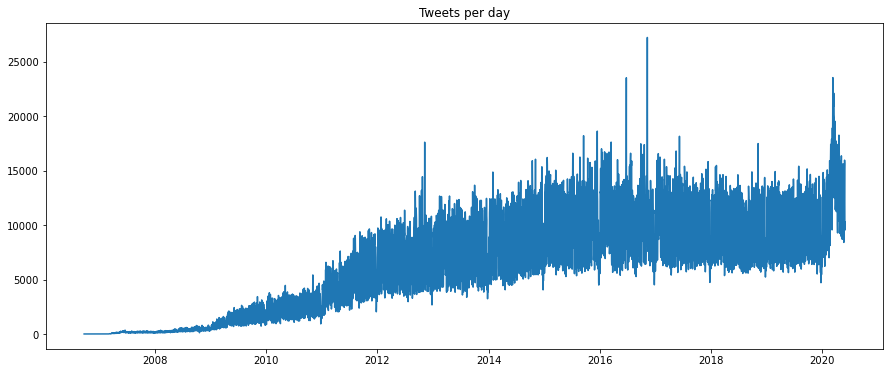

In [31]:
plt.subplots(figsize=(15,6))
plt.plot(tweets_per_day)
plt.title("Tweets per day");

# Users per day

In [24]:
users_per_day = tweet_df.handle.groupby(by=tweet_df.index.date).nunique()

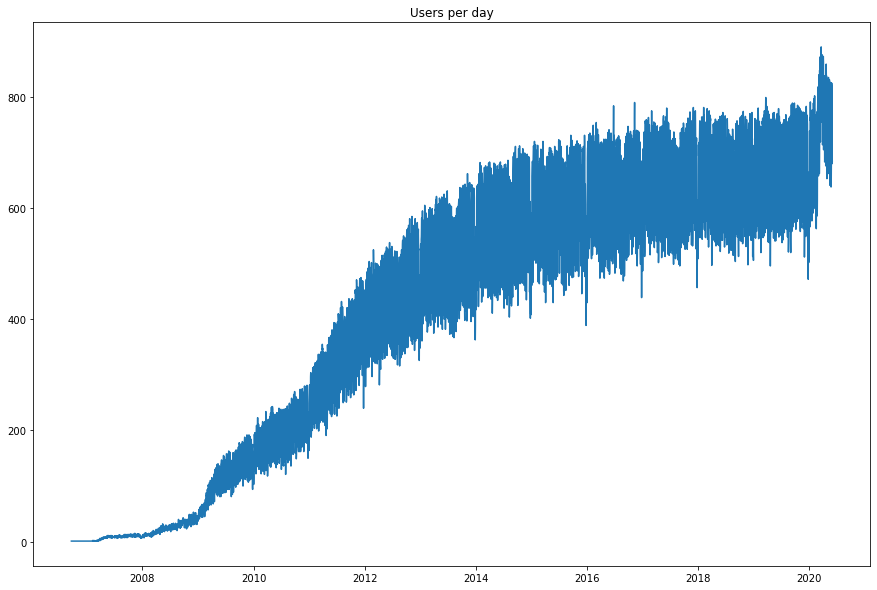

In [32]:
plt.subplots(figsize=(15,10))
plt.plot(users_per_day)
plt.title('Users per day');

## Tweets per user

In [27]:
active_twitters = tweet_df.handle.groupby(by=tweet_df.handle).count()

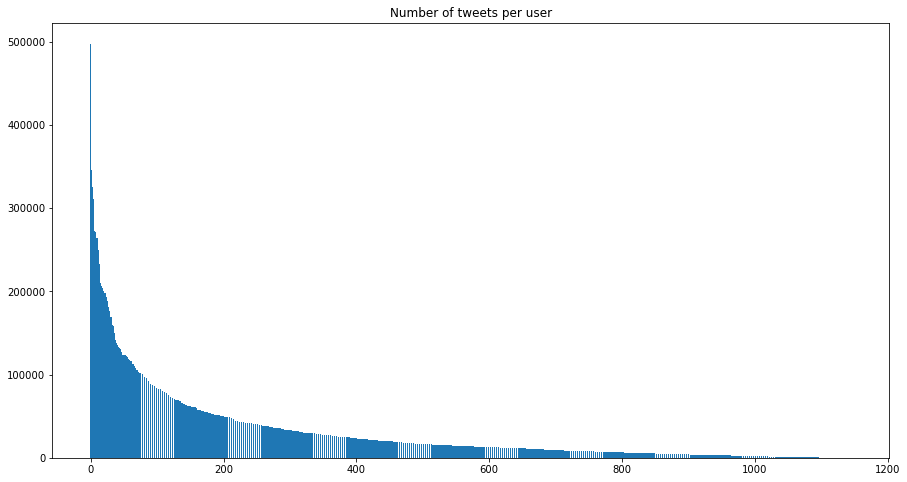

In [33]:
plt.subplots(figsize=(15,8))
plt.bar(range(len(active_twitters)),active_twitters.sort_values(ascending=False))
plt.title('Number of tweets per user');

In [72]:
active_twitters['realDonaldTrump']

43002

## Classification of users

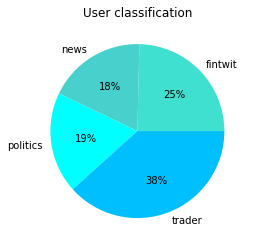

In [30]:
classi = pd.read_csv('data/handle_class.csv')

classi.loc[classi['subclass'] == 'trader','class'] = 'trader'

plt.pie(classi.groupby('class').count()['handle'], 
        labels=classi.groupby('class').count()['handle'].index,
        autopct='%1.0f%%', colors =['turquoise','mediumturquoise', 'cyan', 'deepskyblue'])
plt.title('User classification');